# Task for ML internship of FingerTips Data Intelligence Solutions Pvt Ltd


## Name:- Kiran Vijay Patil

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\THE S.N\OneDrive\Documents\application\train1.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# 1) Data cleaning and preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
A=data.isnull().any()

In [6]:
#Now checking how much columns contain the null values
col=data.columns
null_value_col=A.loc[(A[col]==True)]
print(null_value_col)

LotFrontage     True
Alley           True
MasVnrType      True
MasVnrArea      True
BsmtQual        True
BsmtCond        True
BsmtExposure    True
BsmtFinType1    True
BsmtFinType2    True
Electrical      True
FireplaceQu     True
GarageType      True
GarageYrBlt     True
GarageFinish    True
GarageQual      True
GarageCond      True
PoolQC          True
Fence           True
MiscFeature     True
dtype: bool


In [7]:
# #Now we need to do some statistical preprocessing on this null value containing columns.
column=["LotFrontage","Alley","MasVnrType","MasVnrArea","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Electrical","FireplaceQu","GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

In [8]:
# del null values column from data.
for i in column:
    del data[i]

In [9]:
data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [11]:
col=["MSZoning","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2",
     "BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","ExterQual","ExterCond","Foundation","Heating",
     "HeatingQC","CentralAir","KitchenQual","Functional","PavedDrive","SaleType","SaleCondition"]
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
for i in col:
    data[i]=l1.fit_transform(data[i])

In [12]:
data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,1458,70,3,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,1459,20,3,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,2010,8,4,142125


# 2) EDA and Data visualization

In [13]:
#Some statistical analysis of the data.
data.describe()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,3.028767,10516.828082,0.995890,1.942466,2.777397,0.000685,3.019178,0.062329,...,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,421.610009,42.300571,0.632017,9981.264932,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,365.750000,20.000000,3.000000,7553.500000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129975.000000
50%,730.500000,50.000000,3.000000,9478.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000
75%,1095.250000,70.000000,3.000000,11601.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,214000.000000
max,1460.000000,190.000000,4.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


In [14]:
cor=data.corr()
cor

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,-0.033226,0.008916,0.032122,-0.019659,0.013324,0.049756,0.005847,...,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.139781,-0.024969,0.119289,-0.002940,-0.022844,0.075910,-0.025672,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.034452,0.087654,0.061887,-0.017854,-0.001192,-0.009895,-0.022055,...,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotArea,-0.033226,-0.139781,-0.034452,1.000000,-0.197131,-0.165315,-0.149083,0.010123,-0.121161,0.436868,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
Street,0.008916,-0.024969,0.087654,-0.197131,1.000000,-0.010224,0.115995,0.001682,0.013960,-0.179360,...,0.023082,0.007473,-0.033160,0.004413,-0.022733,0.003690,-0.025043,0.014339,0.006064,0.041036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021172,-0.013585,-0.031496,0.001205,0.003690,-0.033455,-0.011599,-0.051552,0.018902,0.007072,...,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,0.000712,-0.021407,-0.020628,-0.014261,-0.025043,0.036449,0.020507,0.023353,-0.005992,-0.002305,...,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.019773,0.012464,0.097437,0.012292,0.014339,-0.000911,-0.025754,-0.126770,0.014325,0.054858,...,-0.016731,-0.009034,0.004533,0.011009,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.005806,-0.024940,0.009494,0.034169,0.006064,-0.038118,0.033809,-0.089701,0.051579,-0.043095,...,-0.098388,0.004379,-0.020095,-0.067251,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


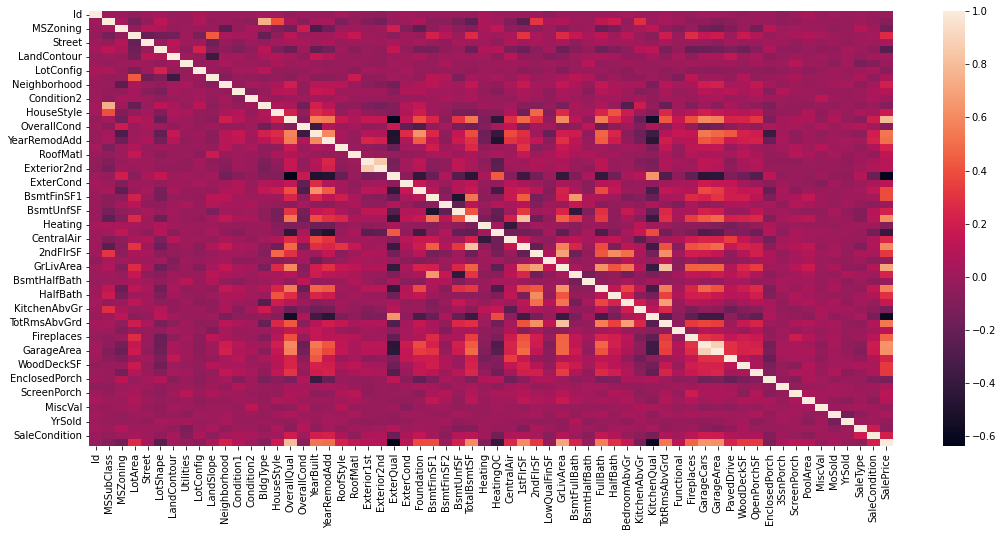

In [15]:
plt.figure(figsize=(18,8))
sns.heatmap(cor)
plt.show()

C:\Users\THE S.N\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


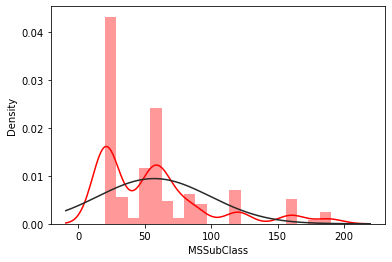

In [16]:
from scipy.stats import norm,skew,kurtosis
sns.distplot(data["MSSubClass"],fit=norm,color="red")
plt.show()
#black curve shows the normal distribution graph and red graph shows distribution of the data.

C:\Users\THE S.N\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


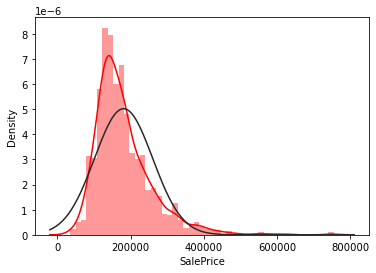

In [17]:
sns.distplot(data["SalePrice"],fit=norm,color="red")
plt.show()
#black curve shows the normal distribution graph and red graph shows distribution of the data.

# 3) Feature Scaling
## a) Standardization

In [18]:
# To scale down our data to standardization with mean 0 and variance 1.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [19]:
x=data.iloc[:,:-1]
Y=data.iloc[:,-1]
X=sc.fit_transform(x)

In [20]:
ind_std_data=pd.DataFrame(X)
ind_std_data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-1.730865,0.073375,-0.045532,-0.207142,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,...,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.313867,0.208502
1,-1.728492,-0.872563,-0.045532,-0.091886,0.064238,0.750731,0.314667,-0.02618,-0.628316,-0.225716,...,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.313867,0.208502
2,-1.726120,0.073375,-0.045532,0.073480,0.064238,-1.378933,0.314667,-0.02618,0.604670,-0.225716,...,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.313867,0.208502
3,-1.723747,0.309859,-0.045532,-0.096897,0.064238,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,...,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,0.313867,-3.426284
4,-1.721374,0.073375,-0.045532,0.375148,0.064238,-1.378933,0.314667,-0.02618,-0.628316,-0.225716,...,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.313867,0.208502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.045532,-0.260560,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,...,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,0.313867,0.208502
1456,1.723747,-0.872563,-0.045532,0.266407,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,...,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,0.313867,0.208502
1457,1.726120,0.309859,-0.045532,-0.147810,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,...,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210,0.313867,0.208502
1458,1.728492,-0.872563,-0.045532,-0.080160,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,...,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210,0.313867,0.208502


## b) Normalization

In [21]:
from sklearn.preprocessing import MinMaxScaler
nor=MinMaxScaler()
X=nor.fit_transform(x)

In [22]:
ind_Norm_data=pd.DataFrame(X)
ind_Norm_data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.000000,0.235294,0.75,0.033420,1.0,1.0,1.0,0.0,1.0,0.0,...,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50,1.0,0.8
1,0.000685,0.000000,0.75,0.038795,1.0,1.0,1.0,0.0,0.5,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25,1.0,0.8
2,0.001371,0.235294,0.75,0.046507,1.0,0.0,1.0,0.0,1.0,0.0,...,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50,1.0,0.8
3,0.002056,0.294118,0.75,0.038561,1.0,0.0,1.0,0.0,0.0,0.0,...,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00,1.0,0.0
4,0.002742,0.235294,0.75,0.060576,1.0,0.0,1.0,0.0,0.5,0.0,...,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50,1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.997258,0.235294,0.75,0.030929,1.0,1.0,1.0,0.0,1.0,0.0,...,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25,1.0,0.8
1456,0.997944,0.000000,0.75,0.055505,1.0,1.0,1.0,0.0,1.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,1.00,1.0,0.8
1457,0.998629,0.294118,0.75,0.036187,1.0,1.0,1.0,0.0,1.0,0.0,...,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,1.00,1.0,0.8
1458,0.999315,0.000000,0.75,0.039342,1.0,1.0,1.0,0.0,1.0,0.0,...,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.272727,1.00,1.0,0.8


# 4) Outlier Treatment

C:\Users\THE S.N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


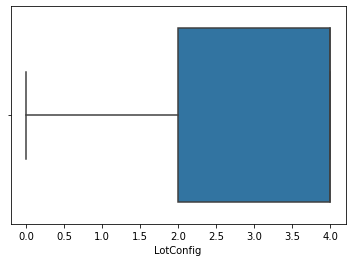

C:\Users\THE S.N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


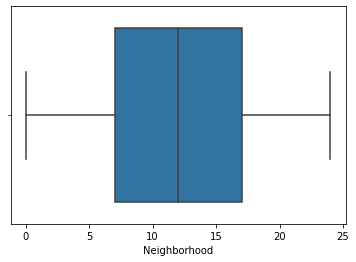

C:\Users\THE S.N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


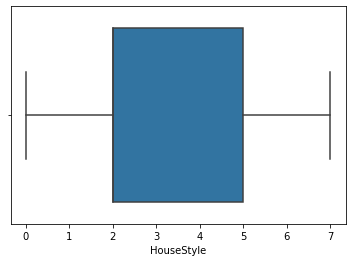

C:\Users\THE S.N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


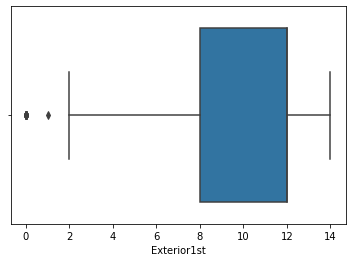

C:\Users\THE S.N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


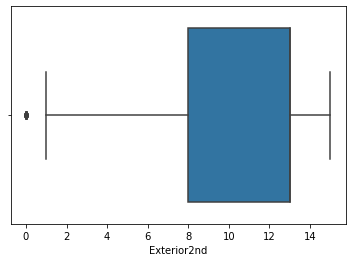

C:\Users\THE S.N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


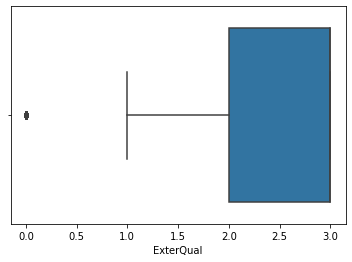

C:\Users\THE S.N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


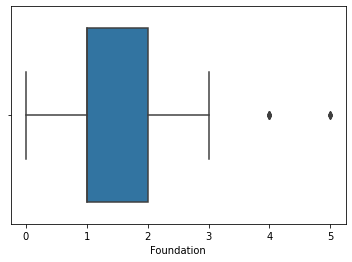

C:\Users\THE S.N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


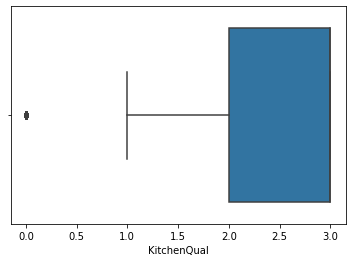

C:\Users\THE S.N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


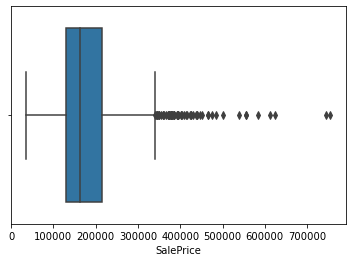

In [23]:
column=["LotConfig","Neighborhood","HouseStyle","Exterior1st","Exterior2nd","ExterQual","Foundation","KitchenQual","SalePrice"]
for i in column:
    sns.boxplot(data[i])
    plt.show()

In [24]:
# For removing this outliers Robust Scaler is best output for outliers.
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
X=rs.fit_transform(x)

In [25]:
ind_rob_data=pd.DataFrame(X)
ind_rob_data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-1.000000,0.2,0.0,-0.254076,0.0,0.0,0.0,0.0,0.0,0.0,...,0.529412,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0,0.0,0.0
1,-0.998629,-0.6,0.0,0.030015,0.0,0.0,0.0,0.0,-1.0,0.0,...,-0.367647,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.5,0.0,0.0
2,-0.997258,0.2,0.0,0.437624,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.250000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
3,-0.995888,0.4,0.0,0.017663,0.0,-1.0,0.0,0.0,-2.0,0.0,...,0.147059,272.0,0.0,0.0,0.0,0.0,-1.333333,-1.0,0.0,-4.0
4,-0.994517,0.2,0.0,1.181201,0.0,-1.0,0.0,0.0,-1.0,0.0,...,0.867647,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.994517,0.2,0.0,-0.385746,0.0,0.0,0.0,0.0,0.0,0.0,...,0.220588,0.0,0.0,0.0,0.0,0.0,0.666667,-0.5,0.0,0.0
1456,0.995888,-0.6,0.0,0.913167,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.367647,0.0,0.0,0.0,0.0,0.0,-1.333333,1.0,0.0,0.0
1457,0.997258,0.4,0.0,-0.107831,0.0,0.0,0.0,0.0,0.0,0.0,...,0.514706,0.0,0.0,0.0,0.0,2500.0,-0.333333,1.0,0.0,0.0
1458,0.998629,-0.6,0.0,0.058918,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.367647,112.0,0.0,0.0,0.0,0.0,-0.666667,1.0,0.0,0.0


## Result:- Outliers from the data is removed by Robust Method

# 5) Linear Regression

In [26]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
#Convert all data into training & Testing data.
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [28]:
# Fit Linear regression model
lr=LinearRegression()
LR=lr.fit(X_train,Y_train)
LR

LinearRegression()

In [29]:
#Prediction using Linear Regression
y_pred=lr.predict(X_test)

In [30]:
from sklearn.metrics import r2_score
ac=r2_score(y_pred,Y_test)

In [31]:
#Testing data accuracy
print(ac*100)

73.55956853444754


## Result:-
### ----Without hypertuning our model gives us 73.5595% accuracy---

# 6) HyperParameter tuning

### For linear regression there is no hyperparameters to tuning but we check on test size ,random state and Lasso, Ridge regression.

### i) Now first we change the test_size and checking their is any affect on our accuracy.

In [32]:
a=[0.2,0.25,0.3]
for i in a:
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=i,random_state=1)
    lr.fit(X_train,Y_train)
    y_pred=lr.predict(X_test)
    ac=r2_score(y_pred,Y_test)
    print("When test size is",i,"R2_score is",ac*100)

When test size is 0.2 R2_score is 73.55956853444754
When test size is 0.25 R2_score is 74.55747868184731
When test size is 0.3 R2_score is 76.64334375521837


### ii) Now change the random_state to check r2 score of the model.

In [33]:
a=[1,13,23,45,67,79,99,111]
for i in a:
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=i)
    lr.fit(X_train,Y_train)
    y_pred=lr.predict(X_test)
    ac=r2_score(y_pred,Y_test)
    print("When random state is",i,"R2_score is",ac*100)

When random state is 1 R2_score is 76.64334375521837
When random state is 13 R2_score is 63.65110807796748
When random state is 23 R2_score is 82.04802189035343
When random state is 45 R2_score is 83.80381875945692
When random state is 67 R2_score is 82.45337013947226
When random state is 79 R2_score is 85.45123761618032
When random state is 99 R2_score is 81.70151550846171
When random state is 111 R2_score is 73.79874332759239


##  Result:- 
### After hyper parameter tuning our model accuracy increased to 85.45% accuracy.

### iii) Now check for lasso and ridge regression

In [34]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()

In [35]:
rdg=Ridge()

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=79)
ls.fit(X_train,Y_train)
y_pred=ls.predict(X_test)
ac=r2_score(y_pred,Y_test)
print("Lasso Regression gives us r2 score",ac*100)
rdg.fit(X_train,Y_train)
y_pred1=rdg.predict(X_test)
ac1=r2_score(y_pred1,Y_test)
print("Ridge Regression gives us r2 score",ac1*100)

Lasso Regression gives us r2 score 85.45195912164071
Ridge Regression gives us r2 score 85.44707255488211


C:\Users\THE S.N\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.916e+11, tolerance: 6.755e+08
  model = cd_fast.enet_coordinate_descent(


## Result:-
###  After Hyperparameter tuning  Lasso and Ridge regression gives us accuracy is  85.45%